In [2]:
%time
import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn import metrics

from sklearn.cluster import KMeans

m_font_size = 20

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


/Users/hellen/.virtualenvs/se2017/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
%time
# import some data to play with
iris = datasets.load_iris()
data = iris.data # iris data
trgt = iris.target # iris data
iris_colors = ['b','r','g']
iris_labels = ['Setosa','Versicolor','Virginica']

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs


In [4]:
min_clusters = 2
max_clusters = 20

intra_cluster = np.zeros([max_clusters,1])
f_out = np.zeros([max_clusters,1])
silhouette = np.zeros([max_clusters,1])
DB_index = np.zeros([max_clusters,1])
#output = np.zeros([max_clusters,len(data)])

for i in range(min_clusters, max_clusters):
    
    kmeans = KMeans(n_clusters=i).fit(data)  
    output = kmeans.predict(data)
    
    silhouette[i] = metrics.silhouette_score(data, output)
    
    #intra-cluster distance - dispersao intra classe 
    intra_cluster[i] = kmeans.inertia_
    
    #mean inter-cluster distance - dispersao media extra classe
    cluster_centers = kmeans.cluster_centers_
    mean_clusters = np.mean(kmeans.cluster_centers_,axis=0)
    
    f_out[i] = 0
    for k in range(i):
        squared_norm_diff = np.linalg.norm(kmeans.cluster_centers_[k]-mean_clusters,ord=2)#**2
        n_members = float(sum(output==k))
        f_out[i] = f_out[i] + n_members*squared_norm_diff

    #Davies-Bouldin Index
    #Dkj = (dk +dj)/dkj
    new_DB = 0
    intra_mean = np.zeros([i,1])
    for k in range(i): #for each cluster
        dist = data[output==k]-cluster_centers[k]
        #norma 2 da distancia entre cada ponto do cluster e o centroid do msm
        intra_mean[k] = np.linalg.norm(dist,ord=2)/sum(output==k)
    Dkj = np.zeros([i,i])
    for k_cluster in range(i):
        for j_cluster in range(i):
            if (k_cluster==j_cluster):
                continue
            dist_clusters = np.linalg.norm(cluster_centers[k_cluster]-cluster_centers[j_cluster],ord=2)
            Dkj[k_cluster,j_cluster] = (intra_mean[k_cluster]+intra_mean[j_cluster])/dist_clusters
    
    DB_index[i] = sum(np.max(Dkj,axis=0))/float(i)      

In [4]:
print intra_mean.shape

(19, 1)


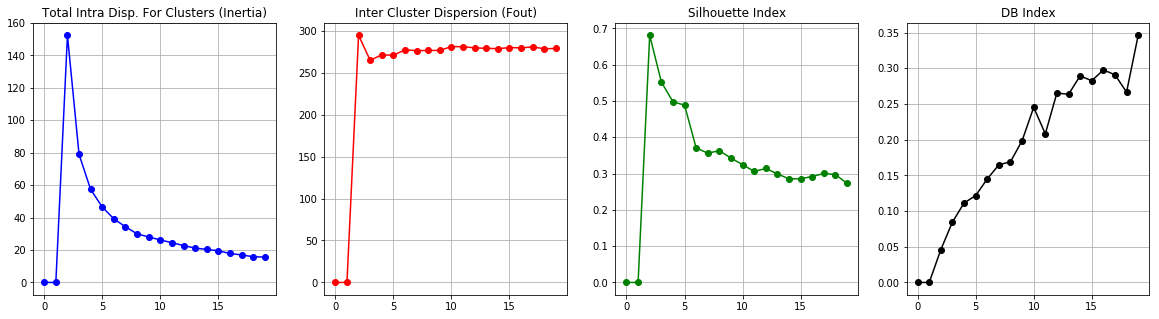

In [10]:
fig, ax = plt.subplots(figsize=(20,5),nrows=1, ncols=4)

ax[0].plot(range(max_clusters),intra_cluster,'bo-')
ax[0].set_title("Total Intra Disp. For Clusters (Inertia)")
ax[0].grid()

ax[1].plot(range(max_clusters),f_out,'ro-' ) #plot in the same graph as intra-cluster dispersion?
ax[1].set_title("Inter Cluster Dispersion (Fout)")
ax[1].grid()

ax[2].plot(range(max_clusters),silhouette,'go-')
ax[2].set_title("Silhouette Index")
ax[2].grid()

ax[3].plot(range(max_clusters),DB_index,'ko-')
ax[3].set_title("DB Index")
ax[3].grid()

In [8]:
#plotar F = F_in + F_out